# Transformations

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

### Translations

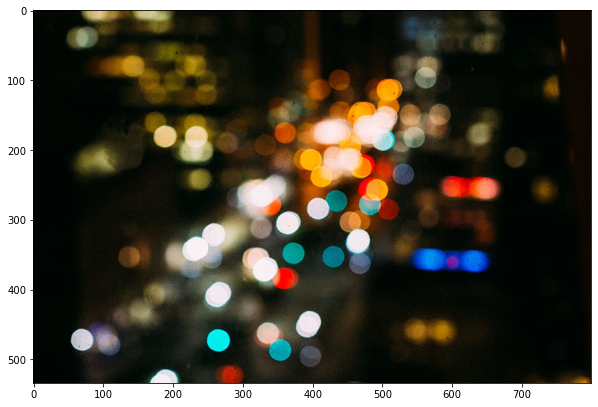

In [65]:
# Load an image
img = cv2.imread('img/bokeh.jpg')
img2 = cv2.imread('img/day1.jpg')

def imshow(img):
    plt.figure(figsize = (10,7));
    plt.imshow(img[:,:,::-1]);

# rgb_img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
imshow(img)

In [66]:
# Store the height and width of the image (you will need them later)
h, w = img.shape[:2]


In [67]:
img.shape

(534, 800, 3)

In [68]:
# Create the translation Matrix
translation_matrix = np.float32([
    [1,0,-50],
    [0,1,-50]
])

In [69]:
translation_matrix

array([[  1.,   0., -50.],
       [  0.,   1., -50.]], dtype=float32)

In [70]:
# Apply the translation to the image using cv2.warpAffine and display the new image
img_changed = cv2.warpAffine(img,translation_matrix,(w,h))

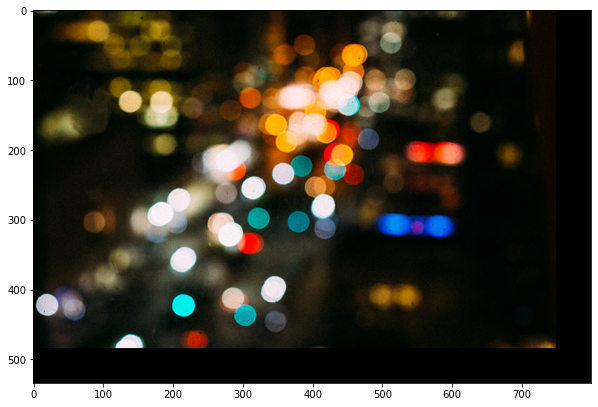

In [71]:
imshow(img_changed)

### Rotation

In [72]:
# Load an image
# img2 = cv2.imread('img/day1.jpg')


# rgb_img2 = cv2.cvtColor(img2, cv2.COLOR_BGR2RGB)
# Create a rotation matrix to rotate the image by 45 degrees (using the center as the pivot point) 
x_center = w//2
y_center = h//2
rotation_matrix = cv2.getRotationMatrix2D((x_center,y_center), 180, 1,)

In [73]:
rotation_matrix

array([[-1.0000000e+00,  1.2246468e-16,  8.0000000e+02],
       [-1.2246468e-16, -1.0000000e+00,  5.3400000e+02]])

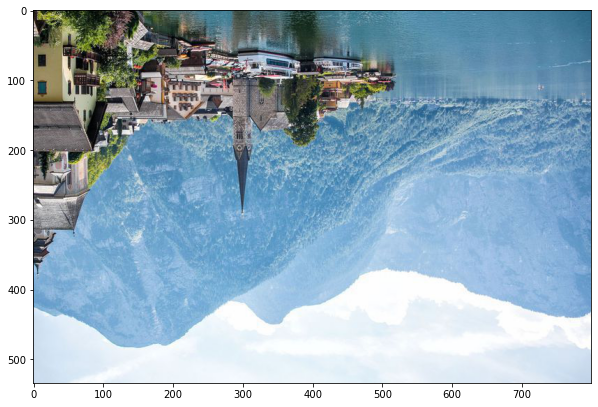

In [76]:
img_rot = cv2.warpAffine(img2,rotation_matrix,(w,h))
imshow(img_rot)

[Hint](# "cv2.getRotationMatrix2D") 


In [6]:
# Apply the rotation matrix to the image and display the rotated image


### Scaling images

In [48]:
scale_matrix = cv2.getRotationMatrix2D((x_center,y_center), 0, 0.5)

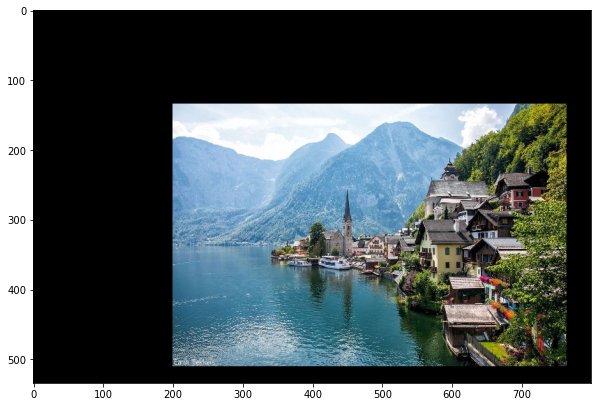

In [49]:
img_scale = cv2.warpAffine(rgb_img,scale_matrix,(w,h))
imshow(img_scale)

#### Interpolation methods

* INTER_NEAREST - a nearest-neighbor interpolation (Fastest)
* INTER_LINEAR - a bilinear interpolation (used by default) (good for upsampling)
* INTER_AREA - resampling using pixel area relation. It may be a preferred method for image decimation, as it gives moire’-free results. But when the image is zoomed, it is similar to the INTER_NEAREST method. (Good for downsampling)
* INTER_CUBIC - a bicubic interpolation over 4x4 pixel neighborhood (Better)
* INTER_LANCZOS4 - a Lanczos interpolation over 8x8 pixel neighborhood (Best one)

In [61]:
new_width = w//2
new_height = h//2
img_half_size = cv2.resize(rgb_img,(new_width, new_height),interpolation=cv2.INTER_NEAREST)


#### Downsampling

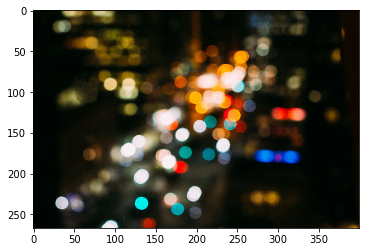

In [62]:
# Load and image and downsample it by half, try all the interpolation methods
# which one renders the best result?
plt.imshow(img_half_size)

[Hint](# "cv2.resize") 

#### Upsampling

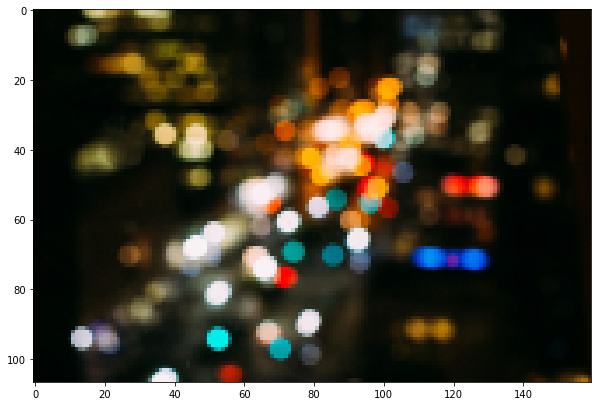

In [57]:
# Load and image and upsample it by double its size, try all the interpolation methods 
# which one renders the best result?

img_half_size_2 = cv2.resize(rgb_img,None,fx=0.2,fy=0.2,interpolation=cv2.INTER_AREA)
imshow(img_half_size_2)